**Uploading Kaggle File**

In [ ]:
from google.colab import files
my_file = files.upload()
import os
import pandas as pd
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

Saving kaggle.json to kaggle.json


**Downloading the Test Data **

In [ ]:
!kaggle datasets download -d vaibhavagarwal14/harry-test-data

  0% 0.00/3.09M [00:00<?, ?B/s]
100% 3.09M/3.09M [00:00<00:00, 97.6MB/s]


**Unzipping the Test_Data**

In [ ]:
!unzip "*.zip"

**Getting the Required Library and Setting up the Environment**

In [ ]:

%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
img_counter=[]
img_counter.append(10)

In [ ]:
import os
os.makedirs("/content/trained_data", exist_ok=True)
my_dir = "/content/trained_data/"

Download the Trained export.pkl File.

In [ ]:
%cd "/content/trained_data"
!wget -O"export.pkl" "https://drive.google.com/uc?id=1EsUQDLD9NPmcpiejnDNcs_BpnR2H-pI-"

/content/trained_data
--2020-08-01 09:09:17--  https://drive.google.com/uc?id=1EsUQDLD9NPmcpiejnDNcs_BpnR2H-pI-
Resolving drive.google.com (drive.google.com)... 74.125.204.113, 74.125.204.139, 74.125.204.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.204.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0c-00-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1joos9d9390tr0qfh50b7vv8ka5v50l2/1596272925000/02910416979911107671/*/1EsUQDLD9NPmcpiejnDNcs_BpnR2H-pI- [following]
--2020-08-01 09:09:18--  https://doc-0c-00-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/1joos9d9390tr0qfh50b7vv8ka5v50l2/1596272925000/02910416979911107671/*/1EsUQDLD9NPmcpiejnDNcs_BpnR2H-pI-
Resolving doc-0c-00-docs.googleusercontent.com (doc-0c-00-docs.googleusercontent.com)... 74.125.203.132, 2404:6800:4008:c03::84
Connecting to doc-0c-00-docs.googleusercontent.com (doc-0c-00-docs.googleu

**Prediction Function**

In [ ]:
predictor = load_learner(my_dir)
def my_predictor(im):
  test_img =open_image(im)
  pred_class,pred_idx,outputs=predictor.predict(test_img)
  return pred_class

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.loss.CrossEntropyLoss' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.container.Sequential' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:649: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute o

Prediction for the single Image

In [ ]:
all_test_images=os.listdir("/content/Test_data")

Lord Voldemort


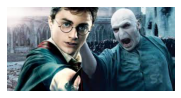

In [ ]:
all_test_images
idx=0
print(my_predictor("/content/Test_data/"+all_test_images[idx]))
img = open_image("/content/Test_data/"+all_test_images[idx])
img.show()

**Making Video**

In [ ]:
import cv2
test_files=os.listdir("/content/Test_data")
os.makedirs("/content/trained_data/Test_Reult",exist_ok=True)
i=0
for test_file in test_files:
  img=cv2.imread("/content/Test_data/"+test_file)
  cv2.imwrite("temp.jpg",img)
  ans_text=my_predictor("temp.jpg")
  font = cv2.FONT_HERSHEY_SIMPLEX 
  i+=1
  org = (0, 50) 
  fontScale = 2
  color = (100, 25, 214,0.1) 
  thickness = 2
  img = cv2.putText(img, str(ans_text), org, font,fontScale, color, thickness, cv2.LINE_AA) 
  cv2.imwrite("/content/trained_data/Test_Reult/"+str(i)+".jpg", img)

In [1]:
%cd "test_result"
!ffmpeg -framerate 1 -pattern_type glob -i '*.jpg' -s 1920x1080  \-c:v libx264 -r 1 -pix_fmt yuv420p ../my_final_output.mp4
%cd ..

[Errno 2] No such file or directory: 'test_result'
/content
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --e

Uploading On Kora

In [ ]:
!pip install -U kora
from kora.drive import upload_public



**URL LINK**

In [ ]:
url = upload_public('my_final_output.mp4')

**Display Video**

In [ ]:
from IPython.display import HTML
HTML(f"""<video src={url} width=500 controls/>""")